In [2]:
!pip install arch==4.13   #PARA INSTALAR LAS LIB EN JUPYTER HAY QUE HACER: !PIP INSTALL PACKAGE 
!pip install statsmodels==0.12.2 # SI YA ESTAN PRESENTE SALTAR ESTE PASO
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install quandl

In [3]:

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt # Alternatively use plotly
import numpy as np
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from arch.unitroot import ADF, PhillipsPerron, KPSS
import quandl
plt.style.use('seaborn-darkgrid')

#### Se descargò en principio en *csv*  y se usò aquello, sin embargo se proporciona el enlace a quandl

In [4]:
#serie1 = pd.read_csv('RICI-RICI.csv', index_col='Date', parse_dates=True) # data previamente descargada como csv
#serie2 = pd.read_csv('BLSI-WPU1411.csv', index_col='Date', parse_dates=True) # data previamente descargada como csv

serie1 = quandl.get("RICI/RICI", authtoken="Yi6T5LfRzWmJs_hU6Zw1", collapse="monthly")
serie2 = quandl.get("BLSI/WPU1411", authtoken="Yi6T5LfRzWmJs_hU6Zw1", collapse="monthly")

In [5]:
def identifica_serie(serie):
    
    plt.rcParams['figure.figsize'] = [15, 5]
    plt.title('Rici INDEX', fontweight='bold')
    plt.ylabel('Price')
    plt.xlabel('Years')
    plt.plot(serie)
    plt.show()
    
    plt.suptitle('Data transformation', fontweight='bold')
    p0 = plt.subplot(1,2,1)
    plt.title('Logathimic Data (A)', fontweight='bold')
    plt.plot(np.log(serie1))           
    plt.xlabel('Years')
    plt.ylabel('Price')
    p1 = plt.subplot(1,2,2)
    plt.title('Differenced Data (B)', fontweight='bold')
    plt.plot(np.log(serie/serie.shift(-12)).dropna().diff(-1).dropna())#.diff(-1) 
    plt.axhline(linestyle = '--', color ='r', label = 'Mean', alpha = .5)
    plt.xlabel('Years')
    plt.ylabel('Price')
    plt.legend(loc='lower left')
    
    plt.figure(figsize=(15,5))
    f, ax = plt.subplots(1, 2)
    sm.graphics.tsa.plot_acf(np.log(serie/serie.shift(-12)).dropna().diff(-1).dropna(), ax = ax[0])
    sm.graphics.tsa.plot_pacf(np.log(serie/serie.shift(-12)).dropna().diff(-1).dropna(), ax = ax[1])

    plt.show()
    print('='*35)
    print('          STATIONARY TEST')
    print('='*35)
    print(ADF(np.log(serie/serie.shift(-12)).dropna().diff(-1).dropna(), trend='nc', lags=0))
    print('='*35)
    print(PhillipsPerron(np.log(serie/serie.shift(-12)).dropna().diff(-1).dropna(), trend='nc'))
    print('='*35)
    print(KPSS(np.log(serie/serie.shift(-12)).dropna().diff(-1).dropna(), trend='ct'))

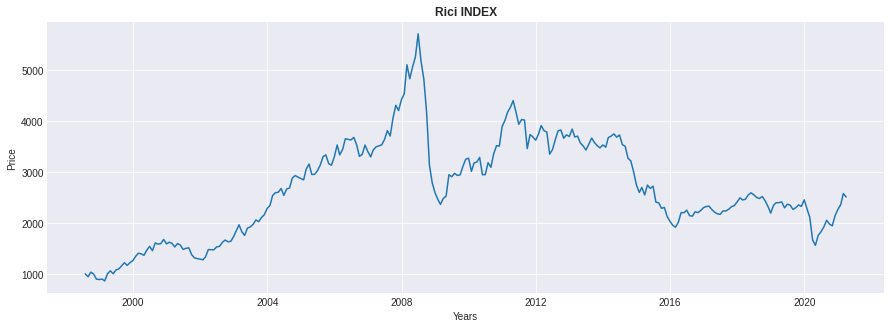

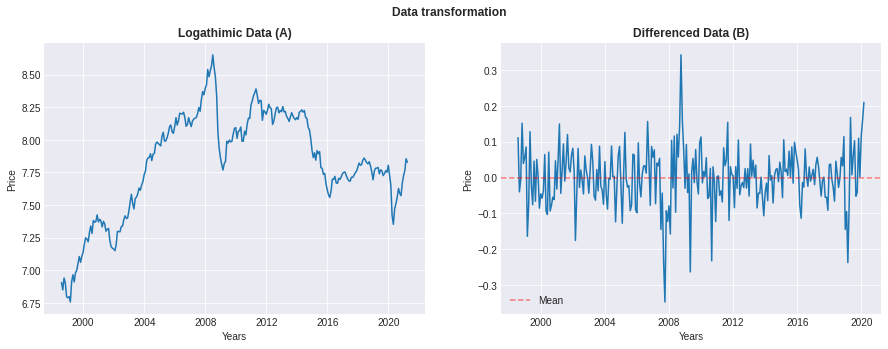

<Figure size 1080x360 with 0 Axes>

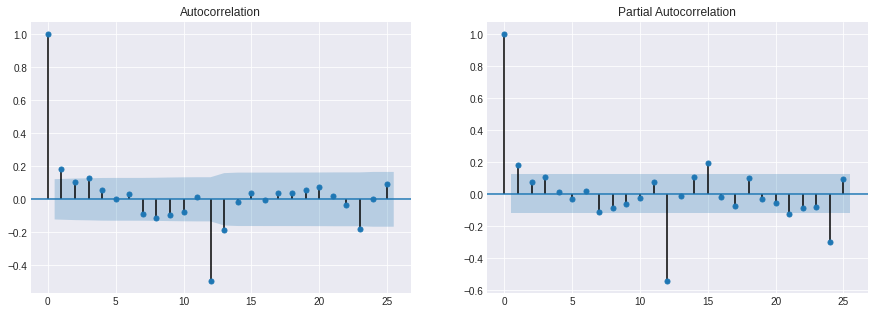

          STATIONARY TEST
   Augmented Dickey-Fuller Results   
Test Statistic                -13.148
P-value                         0.000
Lags                                0
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                -12.915
P-value                         0.000
Lags                               16
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                  0.030
P-value                         0.877
Lags                                6
-------------------------------------

Trend: Constant and Linear Time Trend
Critica

In [6]:
identifica_serie(serie1) # si da warnings.warn(msg, FutureWarning) es porque se ha usado antigua lib.
                            # Ejecutar de nuevo solo esta linea de còdigo!

### $Testing$ $summary$

|$Prueba$|$Test$ $Statistic$|P-value|$H_0$: The process contains a unit root|
|------|--------------|-------|------
|Dickey-Fulley|-13.502|0| Rechazada -Rejected|
|PhillipsPerron|-13.346|0|Rechazada -Rejected|

|$Prueba$|$Test$ $Statistic$|P-value|$H_0$: The process is stationary|
|------|--------------|-------|------|
|KPSS| 0.0323|0.855|No rechazada - Not rejected|

### $MODEL$ $1$

In [ ]:
dates = pd.date_range('1998-7-30', freq="M", periods=len(serie1.Value))
y = pd.Series(serie1.Value, index=dates)
modelo1 = sm.tsa.arima.ARIMA(np.log(y), order=(1, 1, 0), seasonal_order=(0,0,1,12))
modelo1 = modelo1.fit()
print(modelo1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Value   No. Observations:                  272
Model:             ARIMA(1, 1, 0)x(0, 0, [1], 12)   Log Likelihood                 407.220
Date:                            Thu, 01 Apr 2021   AIC                           -808.441
Time:                                    10:56:21   BIC                           -797.634
Sample:                                07-31-1998   HQIC                          -804.102
                                     - 02-28-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1849      0.054      3.419      0.001       0.079       0.291
ma.S.L12      -0.1544      0.068   

In [ ]:
modelo1.conf_int()[0]

ar.L1       0.078932
ma.S.L12   -0.286919
sigma2      0.002497
Name: 0, dtype: float64

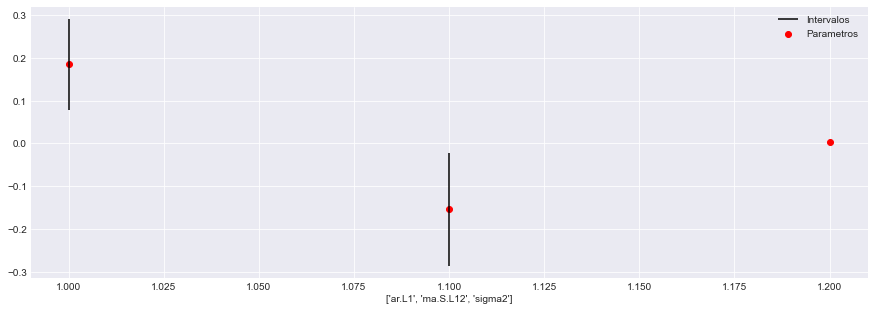

In [ ]:
plt.vlines(x = [1, 1.1, 1.2], ymin = modelo1.conf_int()[0], ymax = modelo1.conf_int()[1], 
          label = 'Intervalos', color ='black')
plt.scatter([1, 1.1, 1.2] ,modelo1.params, marker='o', color="red", 
         label = 'Parametros')
plt.xlabel(modelo1.param_names)
plt.legend()
plt.show()

### $MODEL$ $2$

In [ ]:
modelo2 = ARIMA(np.log(y), order=(0, 1, 1), seasonal_order=(0,1,2,12))
modelo2 = modelo2.fit()
print(modelo2.summary())

                                       SARIMAX Results                                       
Dep. Variable:                                 Value   No. Observations:                  272
Model:             ARIMA(0, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood                 367.033
Date:                               Fri, 19 Mar 2021   AIC                           -726.066
Time:                                       12:13:16   BIC                           -711.838
Sample:                                   07-31-1998   HQIC                          -720.345
                                        - 02-28-2021                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1586      0.057      2.770      0.006       0.046       0.271
ma.S.L12   

### $MODEL$ $Hyndman$

In [ ]:
modelo3 = ARIMA(np.log(y), order=(1, 1, 0), seasonal_order=(2,0,0,12))
modelo3 = modelo3.fit() # èste es el modelo que la rutina de hyndmand sugiere en R <- forecast
print(modelo3.summary()) 

                                    SARIMAX Results                                     
Dep. Variable:                            Value   No. Observations:                  272
Model:             ARIMA(1, 1, 0)x(2, 0, 0, 12)   Log Likelihood                 407.716
Date:                          Thu, 01 Apr 2021   AIC                           -807.432
Time:                                  10:56:47   BIC                           -793.024
Sample:                              07-31-1998   HQIC                          -801.647
                                   - 02-28-2021                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1835      0.054      3.402      0.001       0.078       0.289
ar.S.L12      -0.1471      0.067     -2.182      0.

## Parametros e intervalos de confianza

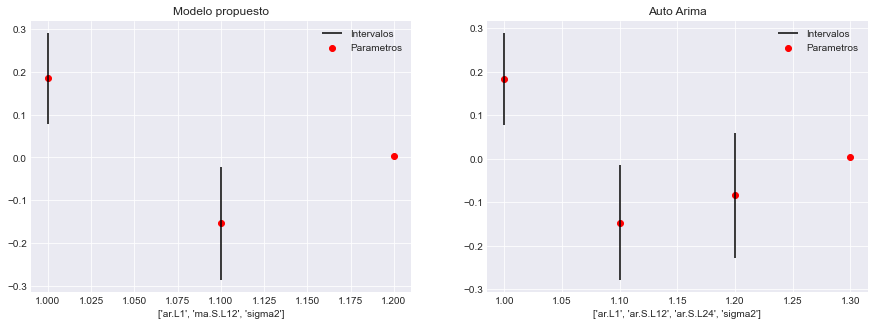

In [ ]:
plt.rcParams['figure.figsize'] = [15, 5]
p0 = plt.subplot(1, 2, 1)
plt.title('Modelo propuesto')
plt.vlines(x = [1, 1.1, 1.2], ymin = modelo1.conf_int()[0], ymax = modelo1.conf_int()[1], 
          label = 'Intervalos', color ='black')
plt.scatter([1, 1.1, 1.2] ,modelo1.params, marker='o', color="red", 
         label = 'Parametros')
plt.xlabel(modelo1.param_names)
plt.legend()

p1 = plt.subplot(1, 2, 2)
plt.title('Auto Arima')
plt.vlines(x = [1, 1.1, 1.2, 1.3], ymin = modelo3.conf_int()[0], ymax = modelo3.conf_int()[1], 
          label = 'Intervalos', color ='black')
plt.scatter([1, 1.1, 1.2, 1.3] ,modelo3.params, marker='o', color="red", 
         label = 'Parametros')
plt.xlabel(modelo3.param_names)
plt.legend()

plt.show()

### *Producer Price Index, Commodities: Motor vehicles (Transportation equipment)*


In [ ]:
def identifica_serie(serie):
    
    plt.rcParams['figure.figsize'] = [15, 5]
    plt.title('Producer Price Index, Commodities: Motor vehicles', fontweight='bold')
    plt.ylabel('Price')
    plt.xlabel('Years')
    plt.plot(serie)
    plt.show()
    
    plt.suptitle('Data transformation', fontweight='bold')
    p0 = plt.subplot(1,2,1)
    plt.title('Logathimic Data (A)', fontweight='bold')
    plt.plot(np.log(serie))           
    plt.xlabel('Years')
    plt.ylabel('Price')
    p1 = plt.subplot(1,2,2)
    plt.title('Differenced Data (B)', fontweight='bold')
    plt.plot(np.log(serie/serie.shift(-12)).dropna().diff(-1))
    plt.axhline(linestyle = '--', color ='r', label = 'Mean', alpha = .5)
    plt.xlabel('Years')
    plt.ylabel('Price')
    plt.legend(loc='lower left')
    
    plt.figure(figsize=(15,5))
    f, ax = plt.subplots(1, 2)
    sm.graphics.tsa.plot_acf(np.log(serie/serie.shift(-12)).dropna().diff(-1).dropna(), ax = ax[0])
    sm.graphics.tsa.plot_pacf(np.log(serie/serie.shift(-12)).dropna().diff(-1).dropna(), ax = ax[1])

    plt.show()
    print('='*35)
    print('          STATIONARY TEST')
    print('='*35)
    print(ADF(np.log(serie/serie.shift(-12)).dropna().diff(-1).dropna(), trend='nc', lags=0))
    print('='*35)
    print(PhillipsPerron(np.log(serie/serie.shift(-12)).dropna().diff(-1).dropna(), trend='nc'))
    print('='*35)
    print(KPSS(np.log(serie/serie.shift(-12)).dropna().diff(-1).dropna(), trend='ct'))

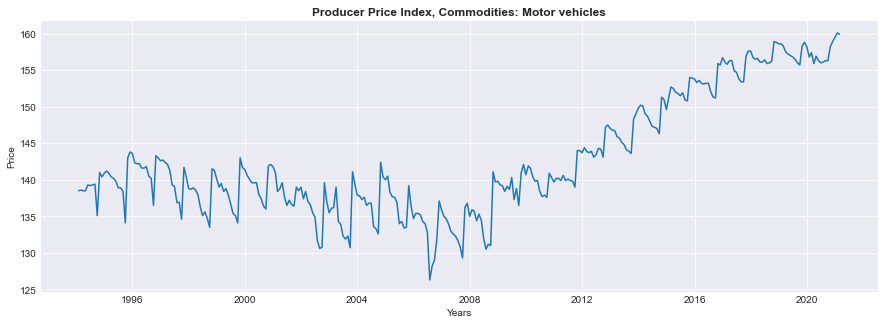

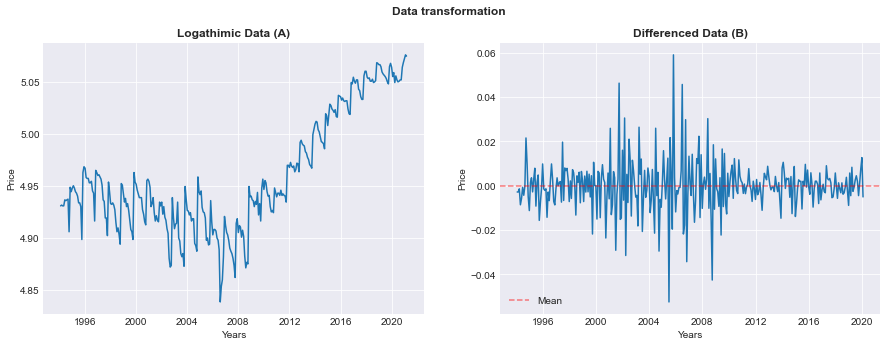

<Figure size 1080x360 with 0 Axes>

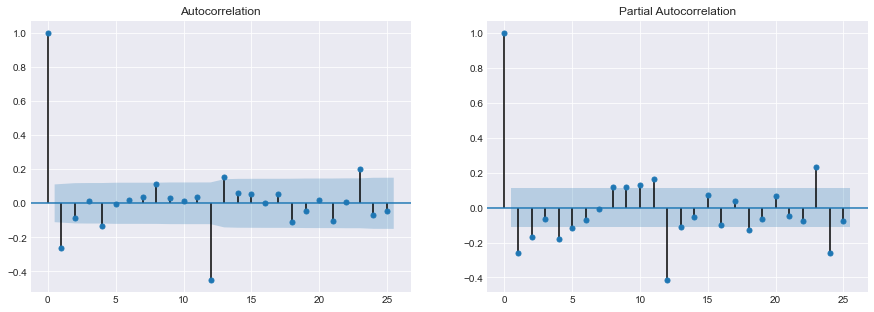

          STATIONARY TEST
   Augmented Dickey-Fuller Results   
Test Statistic                -23.030
P-value                         0.000
Lags                                0
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                -27.712
P-value                         0.000
Lags                               16
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                  0.030
P-value                         0.876
Lags                               13
-------------------------------------

Trend: Constant and Linear Time Trend
Critica

In [ ]:
identifica_serie(serie2)

### $MODEL$ $1$

In [ ]:
dates = pd.date_range('1994-1-31', freq="M", periods=len(serie2.Value))
y = pd.Series(serie2.Value.iloc[::-1], index=dates)
modelo1 = ARIMA(np.log(y), order=(1, 1, 1), seasonal_order=(0,1,1,12))
modelo1 = modelo1.fit()
print(modelo1.summary()) 

                                    SARIMAX Results                                     
Dep. Variable:                            Value   No. Observations:                  326
Model:             ARIMA(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                1043.105
Date:                          Fri, 19 Mar 2021   AIC                          -2078.210
Time:                                  12:14:21   BIC                          -2063.225
Sample:                              01-31-1994   HQIC                         -2072.221
                                   - 02-28-2021                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2699      0.117      2.307      0.021       0.041       0.499
ma.L1         -0.6093      0.101     -6.049      0.

### $MODEL$ $4$

In [ ]:
modelo4 = ARIMA(np.log(y), order=(0, 1, 2), seasonal_order=(3,1,0,12))
modelo4 = modelo4.fit()
print(modelo4.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             Value   No. Observations:                  326
Model:             ARIMA(0, 1, 2)x(3, 1, [], 12)   Log Likelihood                1040.152
Date:                           Fri, 19 Mar 2021   AIC                          -2068.304
Time:                                   12:14:51   BIC                          -2045.827
Sample:                               01-31-1994   HQIC                         -2059.322
                                    - 02-28-2021                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3548      0.040     -8.852      0.000      -0.433      -0.276
ma.L2         -0.1361      0.056     -2.423

## $Model$ $Hyndman$

In [ ]:
modelo = ARIMA(np.log(y), order=(0, 1, 2), seasonal_order=(1,1,1,12))
modelo = modelo.fit()
print(modelo.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Value   No. Observations:                  326
Model:             ARIMA(0, 1, 2)x(1, 1, [1], 12)   Log Likelihood                1043.004
Date:                            Fri, 19 Mar 2021   AIC                          -2076.008
Time:                                    12:14:56   BIC                          -2057.277
Sample:                                01-31-1994   HQIC                         -2068.523
                                     - 02-28-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3327      0.043     -7.653      0.000      -0.418      -0.247
ma.L2         -0.1358      0.058   

In [ ]:
import arch

In [ ]:
arch.__version__

'4.13'